In [1]:
%config IPCompleter.greedy=True

from pyspark import SparkConf
from pyspark import SparkContext


In [2]:
conf = SparkConf().setAppName("161805020_UmitZaferKarakus")
sc = SparkContext (conf=conf)

In [3]:
import socket

def get_Host_name_IP():
    try:
        host_name=socket.gethostname()
        host_ip=socket.gethostbyname(host_name)
        print("Hostname: ", host_name)
        print("IP: ", host_ip)
    except:
        print("Unable to get Hostname and IP")
        
# Driver Code
get_Host_name_IP()

Hostname:  DESKTOP-AEGKDCD
IP:  192.168.1.38


In [10]:
book_data= sc.textFile('BookReviews/book.data')
num_book=book_data.count()
print('Number Of Books: ', num_book)

Number Of Books:  271375


In [11]:
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1800

In [12]:
book_fields=book_data.map(lambda lines: lines.split(';'))
year = book_fields.map(lambda fields: fields[3]).map(lambda x: convert_year(x))

In [13]:
year_filtered = year.filter(lambda x: x != 1800)
book_fields.first()

['0195153448',
 'Classical Mythology',
 'Mark P. O. Morford',
 '2002',
 'Oxford University Press']

In [14]:
year.take(10)

[2002, 2001, 1991, 1999, 1999, 1991, 2000, 1993, 1996, 2002]

In [15]:
book_age= year_filtered.map(lambda yr: 2021-yr).countByValue()
values=list(book_age.values())
bins=list(book_age.keys())

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
bins=np.sort(bins)
print(bins)

[  0   1   9  10  11  13  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 104 107 110 111 112 113 115 117 119 120 121 124]


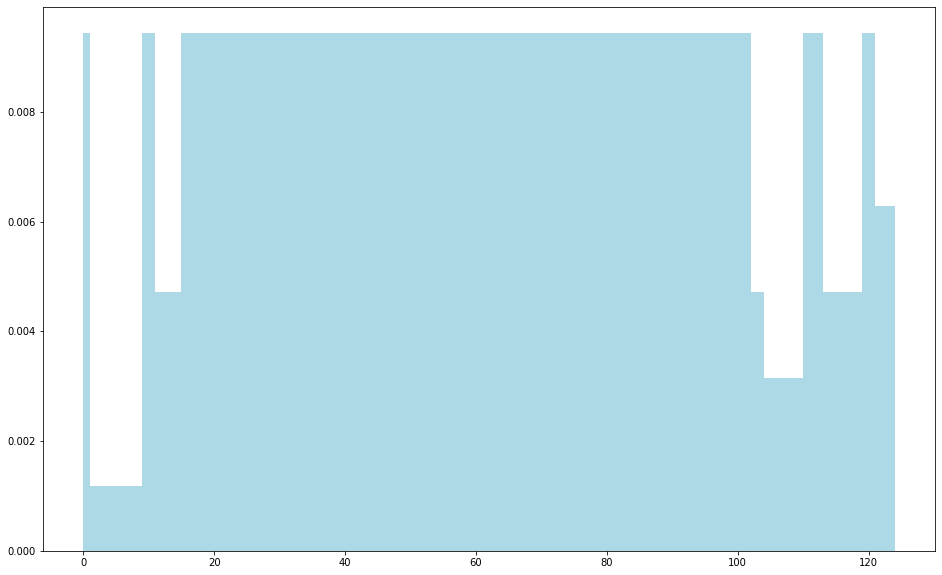

In [18]:
plt.hist(bins, bins=bins, color='lightblue', density=True)
fig = plt.gcf()
fig.set_size_inches(16,10)

In [19]:
user_data=sc.textFile('BookReviews/UserBooks.data')
user_data.first()

'1;nyc, new york, usa;0'

In [20]:
user_fields= user_data.map(lambda line: line.split(';'))
num_ID=user_fields.map(lambda field: field[0]).distinct().count()
num_location=user_fields.map(lambda field: field[1]).distinct().count()
num_age=user_fields.map(lambda field: field[2]).distinct().count()
print('Number Of ID: {}, Location: {}, Age: {}'.format(num_ID, num_location, num_age))

Number Of ID: 278857, Location: 57338, Age: 165


In [21]:
num_ages = user_fields.map(lambda field: (field[2],2)).reduceByKey(lambda x, y: x+y)
for i in num_ages.collect():
    print(i)

('0', 222354)
('17', 6088)
('26', 11094)
('14', 3924)
('19', 7900)
('24', 11374)
('20', 8112)
('34', 9312)
('21', 8876)
('44', 5490)
('57', 3756)
('54', 4280)
('50', 4680)
('53', 4144)
('45', 5036)
('63', 1584)
('33', 9398)
('29', 10586)
('66', 1090)
('40', 6284)
('60', 2250)
('22', 9428)
('16', 5140)
('48', 4606)
('56', 3384)
('1', 576)
('69', 746)
('73', 400)
('9', 124)
('64', 1360)
('12', 384)
('74', 340)
('231', 2)
('83', 48)
('68', 852)
('119', 2)
('77', 164)
('70', 630)
('93', 30)
('8', 108)
('4', 56)
('230', 2)
('10', 168)
('96', 6)
('84', 44)
('82', 50)
('244', 2)
('91', 26)
('128', 2)
('141', 6)
('110', 2)
('219', 2)
('86', 14)
('175', 2)
('209', 4)
('237', 2)
('162', 2)
('100', 14)
('106', 8)
('108', 6)
('88', 4)
('147', 4)
('132', 2)
('102', 6)
('116', 10)
('115', 6)
('226', 2)
('207', 2)
('229', 2)
('138', 2)
('204', 8)
('98', 4)
('223', 2)
('113', 4)
('208', 2)
('107', 2)
('157', 2)
('111', 2)
('146', 2)
('143', 2)
('140', 2)
('189', 2)
('18', 7406)
('61', 2070)
('25', 112

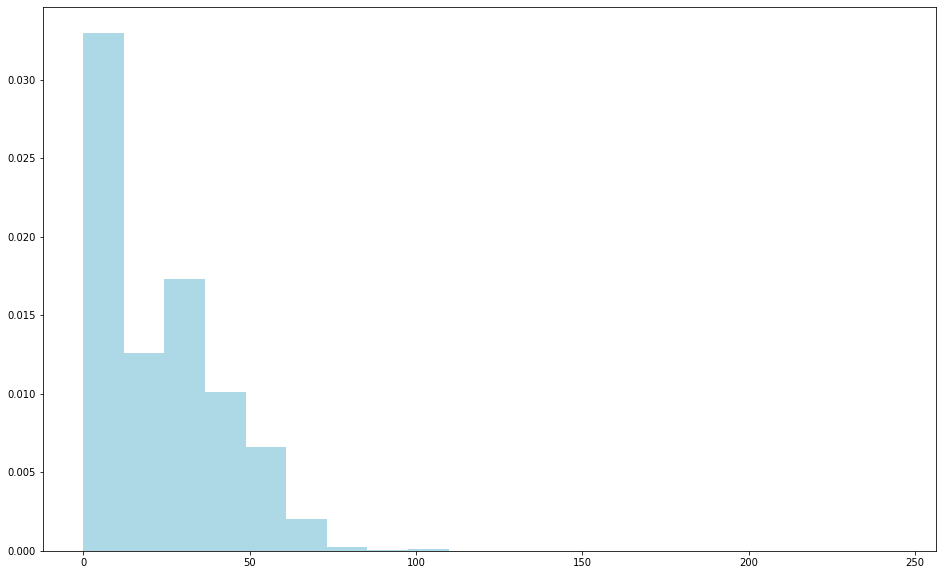

In [22]:
ages = user_fields.map(lambda x: int(x[2])).collect()
plt.hist(ages, bins=20, color='lightblue', density=True)
fig = plt.gcf()
fig.set_size_inches(16,10)

In [70]:
ratings_data = sc.textFile('BookReviews/rating.data')

In [71]:
def lower_clean_str(x):
  punc='!#$%&\'()*+,-./:<=>?@[\\]^_`{|}~qwertyuıopğüasdfghjklşizxcvbnmöçæß@€"¨é£/º'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [72]:
rating_data=ratings_data.map(lower_clean_str)

In [73]:
rating_data.take(10)

['183;100940586;5',
 '103915;102233681;3',
 '186025;102345711;1',
 '110029;103571073;2',
 '147451;103571073;1',
 '193952;105254988;5',
 '166065;105612457;1',
 '174054;106412227;1',
 '135383;106711106;3',
 '15923;107884471;1']

In [74]:
num_ratings= rating_data.count()
print('Number Of Rating: ',num_ratings)

Number Of Rating:  668392


In [75]:
rating_fields=rating_data.map(lambda line: line.split(';'))
ratings=rating_fields.map(lambda field: int(field[2]))
ratings.stats()



(count: 668392, mean: 2.1323220505332277, stdev: 1.563168032581137, max: 5.0, min: 1.0)

In [78]:
count_by_rating = ratings.countByValue()
x_axis = np.array(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])
print(x_axis)

dict_keys([5, 3, 1, 2, 4])


In [79]:
y_axis_normed = y_axis / y_axis.sum()
pos = np.arange(5)
width = 1.0

[Text(0.5, 0, '5'),
 Text(1.5, 0, '3'),
 Text(2.5, 0, '1'),
 Text(3.5, 0, '2'),
 Text(4.5, 0, '4')]

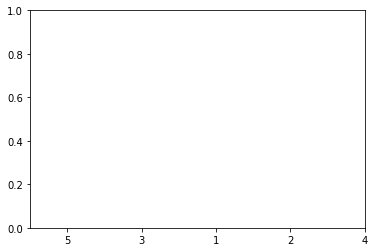

In [80]:
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels([5, 3, 1, 2, 4])

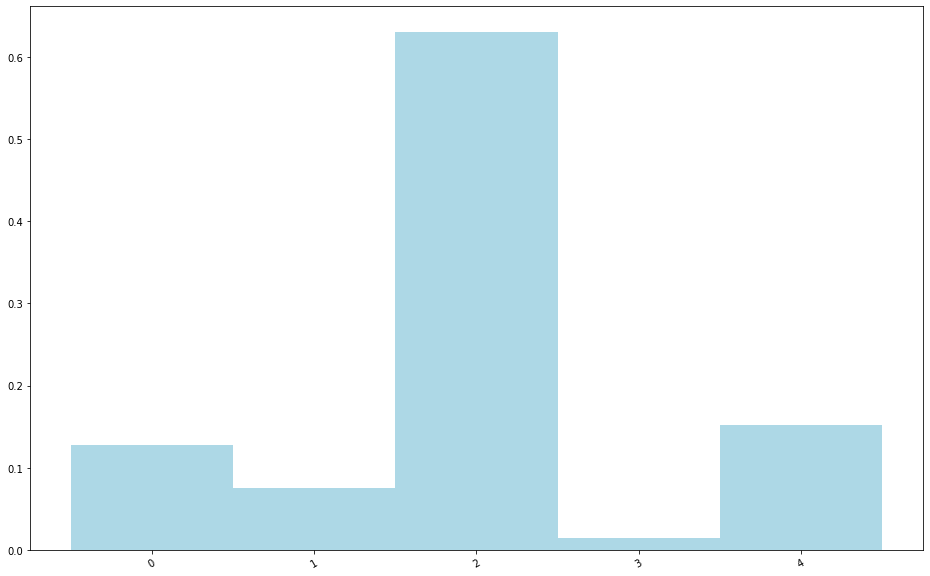

In [81]:
plt.bar(pos, y_axis_normed, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [82]:
raw_ratings=rating_data.map(lambda x: x.split(';')[:3])
raw_ratings.take(5)

[['183', '100940586', '5'],
 ['103915', '102233681', '3'],
 ['186025', '102345711', '1'],
 ['110029', '103571073', '2'],
 ['147451', '103571073', '1']]

In [83]:
from pyspark.mllib.recommendation import ALS
from pyspark.mllib.recommendation import Rating

ratings=raw_ratings.map(lambda x: Rating(int(x[0]),int(x[1]),float(x[2])))
ratings.take(10)

[Rating(user=183, product=100940586, rating=5.0),
 Rating(user=103915, product=102233681, rating=3.0),
 Rating(user=186025, product=102345711, rating=1.0),
 Rating(user=110029, product=103571073, rating=2.0),
 Rating(user=147451, product=103571073, rating=1.0),
 Rating(user=193952, product=105254988, rating=5.0),
 Rating(user=166065, product=105612457, rating=1.0),
 Rating(user=174054, product=106412227, rating=1.0),
 Rating(user=135383, product=106711106, rating=3.0),
 Rating(user=15923, product=107884471, rating=1.0)]

In [84]:
model=ALS.train(ratings,50,10,0.01)

In [85]:
model.userFeatures()

PythonRDD[732] at RDD at PythonRDD.scala:53

In [86]:
model.userFeatures().count()

60434

In [87]:
predicted_rating=model.predict(183, 380788624)
print(predicted_rating)

-0.12791180685330678


In [88]:
userId=276725
K = 10
top_k_recs=model.recommendProducts(userId,K)
for i in top_k_recs:
    print(i)

Rating(user=276725, product=679805273, rating=1.0296740787083496)
Rating(user=276725, product=747532745, rating=1.003235136891442)
Rating(user=276725, product=345451043, rating=0.9994236081966617)
Rating(user=276725, product=380014300, rating=0.9903991959116699)
Rating(user=276725, product=553258524, rating=0.979842778869221)
Rating(user=276725, product=520227352, rating=0.9617101963780914)
Rating(user=276725, product=439425220, rating=0.9532786296470459)
Rating(user=276725, product=758204434, rating=0.9476301326591083)
Rating(user=276725, product=312989970, rating=0.9473570404242899)
Rating(user=276725, product=385507607, rating=0.9471713803308084)


In [89]:
productID =100940586
K = 5
topKitem = model.recommendUsers(productID, K)
for i in topKitem:
    print(i)

Rating(user=124989, product=100940586, rating=5.340670723955952)
Rating(user=183, product=100940586, rating=4.990360070791267)
Rating(user=6073, product=100940586, rating=4.4754600918755445)
Rating(user=60621, product=100940586, rating=4.337069422495178)
Rating(user=62464, product=100940586, rating=3.873728595949604)


In [90]:
book_fields.first()

['0195153448',
 'Classical Mythology',
 'Mark P. O. Morford',
 '2002',
 'Oxford University Press']

In [91]:
titles = book_fields.map(lambda line: line[:2]).map(lambda x: (x[0], x[1])).collectAsMap()

In [92]:
titles['743226783']

"Where You'll Find Me: And Other Stories"

In [93]:
books_for_user= ratings.keyBy(lambda x: x.user).lookup(183)
books_for_user

[Rating(user=183, product=100940586, rating=5.0),
 Rating(user=183, product=127420598, rating=4.0),
 Rating(user=183, product=140274871, rating=4.0),
 Rating(user=183, product=194114503, rating=1.0),
 Rating(user=183, product=203671503, rating=4.0),
 Rating(user=183, product=350573385, rating=1.0),
 Rating(user=183, product=350583378, rating=1.0),
 Rating(user=183, product=350903808, rating=1.0),
 Rating(user=183, product=586081953, rating=1.0),
 Rating(user=183, product=972233028, rating=1.0)]

In [94]:
len(books_for_user)

10

In [95]:
userId = 183
K=10
top_k_recs = model.recommendProducts(userId,K)
for i in top_k_recs:
    print(i)

Rating(user=183, product=100940586, rating=4.990360070791267)
Rating(user=183, product=203671503, rating=4.0012248871063125)
Rating(user=183, product=140274871, rating=3.9922881211569514)
Rating(user=183, product=127420598, rating=3.9922881211569514)
Rating(user=183, product=747269661, rating=2.7242304696148336)
Rating(user=183, product=969691319, rating=2.643701983542024)
Rating(user=183, product=807554573, rating=2.6103488464845244)
Rating(user=183, product=380899825, rating=2.3700692617482155)
Rating(user=183, product=345406931, rating=2.2860298787316933)
Rating(user=183, product=140108106, rating=2.251721530763903)


In [96]:
def cosineSimilarity(item_id,a,b):
    dot=np.dot(a,b)
    norma=np.linalg.norm(a)
    normb=np.linalg.norm(b)
    cos = dot/(norma*normb)
    return item_id, cos

In [97]:
item_id= 140371852
item_vector= model.productFeatures().lookup(item_id)[0]
item_vector

array('d', [0.6620384454727173, -0.20471017062664032, 0.6614531874656677, 0.9574980735778809, -0.35283491015434265, 0.008476216346025467, -0.27864381670951843, -0.16317319869995117, -0.2237146645784378, 0.11710494756698608, 0.003963908646255732, -1.0066832304000854, 0.3771415650844574, 0.38041165471076965, 0.5454899072647095, -0.2930506765842438, 0.5481027364730835, 0.41346243023872375, -0.28860583901405334, -1.6807528734207153, 0.09963244944810867, 0.6067501902580261, 0.07557670027017593, -0.9908071160316467, -0.6433254480361938, 0.40709948539733887, 0.32628774642944336, -0.2809356153011322, 0.6023945808410645, 0.006850887089967728, 0.34278902411460876, 0.2350858747959137, -0.09921209514141083, 0.5272015333175659, -0.34462597966194153, 0.8962835073471069, 0.19439934194087982, -0.6152797341346741, 0.22783173620700836, -1.2206610441207886, 0.682213306427002, 0.6299244165420532, -0.20341239869594574, -0.21457573771476746, -0.12438277155160904, -0.30852770805358887, -0.4632893204689026, 1

In [98]:
cosineSimilarity(item_id,item_vector,item_vector)

(140371852, 0.9999999999999998)

In [99]:
sims = model.productFeatures().map(lambda data: cosineSimillarity(data[0],data[1],item_vector))

In [100]:
data = rating_data
(trainingRatings, testRatings) = data.randomSplit([0.7, 0.3], seed= 5020)

In [101]:
trainingRatings.take(10)

['183;100940586;5',
 '186025;102345711;1',
 '110029;103571073;2',
 '166065;105612457;1',
 '135383;106711106;3',
 '15923;107884471;1',
 '124487;107884471;1',
 '114990;110239758;4',
 '71714;111111110;2',
 '177938;111120020;4']

In [102]:
testRatings.take(10)

['103915;102233681;3',
 '147451;103571073;1',
 '193952;105254988;5',
 '174054;106412227;1',
 '109204;108520690;1',
 '136550;112948865;5',
 '63714;113100256;5',
 '156462;114187088;1',
 '95672;115092597;3',
 '23902;115522247;3']

In [103]:
trainingData = trainingRatings.map(lambda l: l.split(';')).map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))
trainingData.first()

Rating(user=183, product=100940586, rating=5.0)

In [104]:
testData = testRatings.map(lambda l: l.split(';')).map(lambda l: (int(l[0]), int(l[1])))
testData.first()

(103915, 102233681)

In [105]:
rank = 10
numIterations = 10
model = ALS.train(trainingData, rank, numIterations)

In [106]:
model.predict(110029,103571073)

2.019430481490687

In [107]:
predictions = model.predictAll(testData)
predictions.first()

Rating(user=78783, product=821727540, rating=0.8540844797239797)

In [108]:
allPredictedRatings=predictions.map(lambda l: (float(l[2])))

In [109]:
allPredictedRatings.take(5)

[0.8540844797239797,
 0.4871899515299728,
 0.6304145409212414,
 1.4681052165227046,
 1.5010258553168985]

In [110]:
arr_allPredictedRatings=allPredictedRatings.collect()

In [111]:
testData = testRatings.map(lambda l: l.split(';')).map(lambda l: (int(l[0]), int(l[1])))

In [112]:
allTestRatings= testRatings.map(lambda l: l.split(';')).map(lambda l: (float(l[2])))

In [113]:
allTestRatings.take(5)

[3.0, 1.0, 5.0, 1.0, 1.0]

In [114]:
arr_allTestRatings=allTestRatings.collect()

In [115]:
type(arr_allTestRatings)

list

In [116]:
sum = 0
n = len(arr_allPredictedRatings)
for i in range(0,n):
    difference=arr_allTestRatings[i]-arr_allPredictedRatings[i]
    squared_difference = difference**2
    sum = sum + squared_difference
MSE=sum/n
print("Teh Mean Square Error Is: ",MSE)

Teh Mean Square Error Is:  5.905787419480929
